# Re-analyzing suicide data: The power of inference for future development

In the next few lines I'll use technologies that have been around for at least 30 years, but that have had an amazing growth in the last few years thanks to the advancement in the semiconductor field, the increment in processing power and storage, and what I would argument could be considered "the entrepenourial spirit", the _zeitgeist_ of the 21st century.

For this task will approach the data provided by Szamil [WHO Suicide Statistics](https://www.kaggle.com/datasets/szamil/who-suicide-statistics), this dataset was cleaned and parsed as CSV by him as part of his research around the statistical changes around the world in the 21st century. This data covers year 1979 to 2016.

In the methodological POV we'll be using [Python v.3.10](https://www.python.org/) and the [Jupyter Notebook](https://jupyter.org/) pip package. Consider that we are using a Virtual Environment for this project, if you have never heard about venv or virtual environments for Python I recommend reading more about them in the docs ([here](https://docs.python.org/3/library/venv.html)). Virtual Environments are essential as part of the solution for problems caused by package updates, install in your venv all the packages needed for your project in an isolated manner from regular Python. Note that you can bypass this problems when using Anaconda (but I feel its somewhat laggy compared to vainilla Python).

### Library Imports
As the first part of this analysis we'll import the necessary libraries. I'll explain the use of each one after the import. If you don't have the libraries yet use the following command inside your venv:

`pip install NAMEOFTHELIBRARY` 

In [13]:
import folium
import pandas as pd
import json
import geopandas as gp
import matplotlib.pyplot as plt
import contextily as ctx
from folium import plugins
import numpy as np

*[Folium](https://python-visualization.github.io/folium/)* allows python code transformation into leaflet.js maps, which are interactive maps based on javascript elements. This allows in turn for easy integration with web projects and online dashboards.

*[Pandas]()* are a nowadays standard data analysis library which allows for many data cleaning and combining possibilities, as well as many statistical tools. The package geopandas allows for geographical analysis and map production.

*Json* is a basic python library which allows for JSON manipulation. JSON is a very popular way of transfering data around in the internet, as it allows for very fast communication between server and client.

These 3 libraries will be the basis for our analysis

### Map creations

Now we'll proceed to create a basic map around our data

In [14]:
# Bring out map skeleton into the table, in this case it was a file for America (the continent)
map_latam = gp.read_file(open('./data/custom.json'))
# Clean the unwanted columns
map_latam = map_latam.drop([29,26,21,22,12])
# Check remaining columns
list(map_latam)


['featurecla',
 'scalerank',
 'labelrank',
 'sovereignt',
 'sov_a3',
 'adm0_dif',
 'level',
 'type',
 'tlc',
 'admin',
 'adm0_a3',
 'geou_dif',
 'geounit',
 'gu_a3',
 'su_dif',
 'subunit',
 'su_a3',
 'brk_diff',
 'name',
 'name_long',
 'brk_a3',
 'brk_name',
 'brk_group',
 'abbrev',
 'postal',
 'formal_en',
 'formal_fr',
 'name_ciawf',
 'note_adm0',
 'note_brk',
 'name_sort',
 'name_alt',
 'mapcolor7',
 'mapcolor8',
 'mapcolor9',
 'mapcolor13',
 'pop_est',
 'pop_rank',
 'pop_year',
 'gdp_md',
 'gdp_year',
 'economy',
 'income_grp',
 'fips_10',
 'iso_a2',
 'iso_a2_eh',
 'iso_a3',
 'iso_a3_eh',
 'iso_n3',
 'iso_n3_eh',
 'un_a3',
 'wb_a2',
 'wb_a3',
 'woe_id',
 'woe_id_eh',
 'woe_note',
 'adm0_iso',
 'adm0_diff',
 'adm0_tlc',
 'adm0_a3_us',
 'adm0_a3_fr',
 'adm0_a3_ru',
 'adm0_a3_es',
 'adm0_a3_cn',
 'adm0_a3_tw',
 'adm0_a3_in',
 'adm0_a3_np',
 'adm0_a3_pk',
 'adm0_a3_de',
 'adm0_a3_gb',
 'adm0_a3_br',
 'adm0_a3_il',
 'adm0_a3_ps',
 'adm0_a3_sa',
 'adm0_a3_eg',
 'adm0_a3_ma',
 'adm0_a3_pt

I don't know anything about GeoJson besides its JSON, I guess that Latitude and Longitude columns must bey key for map generation, but don't want to mess up the graph, since I've worked with other geographical data before i'm considering the vector has many points, so I'll leave the columns as they are. 

To analyze the data I'll combine this information with the suicide database.

In [15]:
'''#initialize the map around LA
latam = folium.Map(location=[-8.783195,-55.491477], tiles='OpenStreetMap', zoom_start=1)

#add the shape of LA to the map
folium.GeoJson(map_latam).add_to(latam)
latam.save('latammap.html')
latam
'''

"#initialize the map around LA\nlatam = folium.Map(location=[-8.783195,-55.491477], tiles='OpenStreetMap', zoom_start=1)\n\n#add the shape of LA to the map\nfolium.GeoJson(map_latam).add_to(latam)\nlatam.save('latammap.html')\nlatam\n"

Since our map does more of an International comparison, I feel that an interactive map is not so useful. Maybe I'll refactor this one if I combine national level data with international data, but I feel thats still further down the road. We can re-use our map_latam geopanda dataframe to plot it.

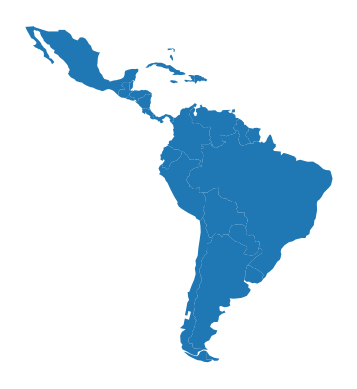

In [16]:
# Build a static map of latin america
map = map_latam.plot()
map.set_axis_off()

### The choropleth map
I like the name "Choropleth" for refering to colour coded maps, it makes me feel important and smart. For making a colour map we first need to combine our map GeoJson file with our suicide database. Another way of doing this is transforming our database into a geopandas DB, but since we already made one copy of data at 'maps/r' previously I'll will combine the tables we have (in csv format). Are there better formats for CSV? Recommendations are encouraged.
- Merge tables in py
- Generate maps with new tables
- Make a quick map analysis
- Update to github

In [17]:
# First we load latam data. This data was obtained from kaggle
latam = pd.read_csv('./data/latam_suicidio.csv')
latam.head()


,country,year,sex,age,suicides_no,population,suicides_100k,gdp_per_year,gdp_per_capita,generation
0,Argentina,1985,male,75+ years,202.0,363000,55.65,"88,41,66,68,900",3264.0,G.I. Generation
1,Argentina,1985,male,55-74 years,485.0,1997000,24.29,"88,41,66,68,900",3264.0,G.I. Generation
2,Argentina,1985,male,35-54 years,414.0,3346300,12.37,"88,41,66,68,900",3264.0,Silent
3,Argentina,1985,female,55-74 years,210.0,2304000,9.11,"88,41,66,68,900",3264.0,G.I. Generation
4,Argentina,1985,male,25-34 years,177.0,2234200,7.92,"88,41,66,68,900",3264.0,Boomers


In [18]:
# We'll also create some data we'll use for our maps and one big combo table
avg_100k = latam.groupby(['country'],as_index=False).suicides_100k.mean().rename(columns=dict(suicides_100k='avg_100k'))
avg_100k_gen = latam.groupby(['country','generation'],as_index=False).suicides_100k.mean().rename(columns=dict(suicides_100k='avg_100k_gen'))
avg_suicides = latam.groupby(['country'],as_index=False).suicides_no.mean().rename(columns=dict(suicides_no='avg_suicides'))
avg_suicides_gen = latam.groupby(['country','generation'],as_index=False).suicides_no.mean().rename(columns=dict(suicides_no='avg_suicides_gen'))

avg_suicides.head()

,country,avg_suicides
0,Argentina,225.321078
1,Brazil,627.399510
2,Chile,112.623737
3,Colombia,150.960784
4,Costa Rica,20.093137


In [19]:
latambig = avg_100k
latambig = latambig.merge(avg_100k_gen, on='country')
latambig = latambig.merge(avg_suicides, on='country')
latambig = latambig.merge(avg_suicides_gen, on='country')
latambig.head()

,country,avg_100k,generation_x,avg_100k_gen,avg_suicides,generation_y,avg_suicides_gen
0,Argentina,9.324805,Boomers,7.182865,225.321078,Boomers,283.864865
1,Argentina,9.324805,Boomers,7.182865,225.321078,G.I. Generation,193.321429
2,Argentina,9.324805,Boomers,7.182865,225.321078,Generation X,204.260000
3,Argentina,9.324805,Boomers,7.182865,225.321078,Generation Z,30.444444
4,Argentina,9.324805,Boomers,7.182865,225.321078,Millenials,223.416667


For merging I'm using a left join, this has SQL (or Relational Data Bases) like behaviour, so it will mantain the contents of the left df (map_latam, in this case a geopanda) and add the right elements that coincide with the declared *on* statements, in this case Sovereignt for the geopd and country for our exported csv pd. Note that using the left join on a geopanda is the only way to keep it on geopd form (according to its docs).

In [20]:
# Merge the map with the data and list the headers
avg100kMap=map_latam.merge(avg_100k,how='left', left_on='sovereignt', right_on='country')

In [21]:
avg100kGenMap=map_latam.merge(avg_100k_gen,how='left', left_on='sovereignt', right_on='country')

In [22]:
avSuicideGenMap=map_latam.merge(avg_suicides_gen,how='left', left_on='sovereignt', right_on='country')

In [23]:
avgSuicideMap=map_latam.merge(avg_suicides,how='left', left_on='sovereignt', right_on='country')

In [24]:
latambigMap=map_latam.merge(latambig,how='left', left_on='sovereignt', right_on='country')

Now we'll take the choropleth geopandas features for a ride (a small ride, at least for now)

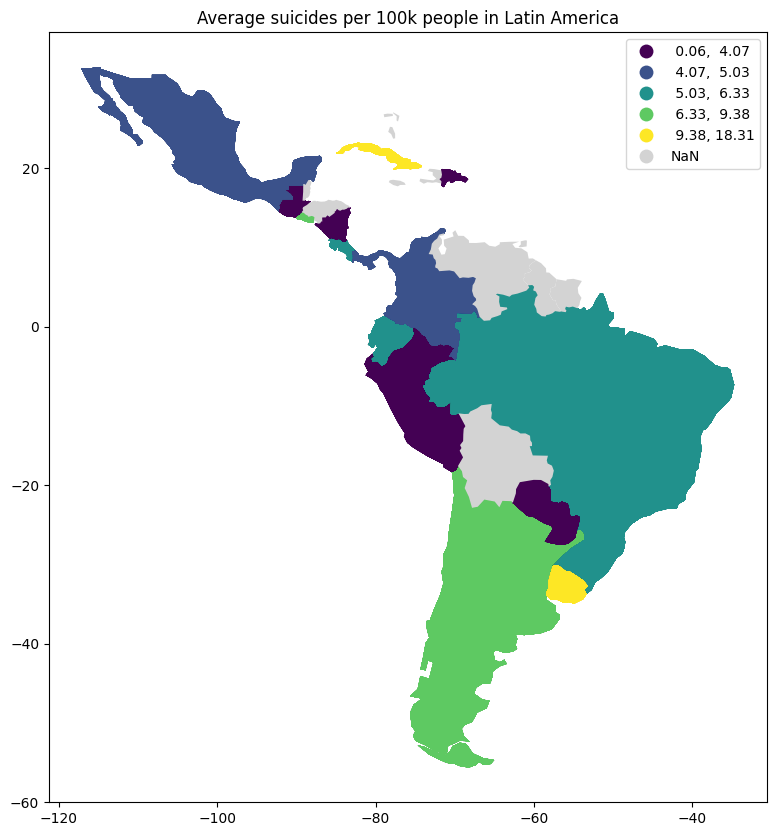

In [25]:
# Map for 100k and 100k Gen
avg_100k = latambigMap.plot(
    column='avg_100k',
    legend=True,
    figsize=(15,10),
    missing_kwds={'color': 'lightgrey'},
    scheme='quantiles')

avg_100k.set(title='Average suicides per 100k people in Latin America')

plt.savefig('avg100k.jpeg')

AttributeError: 'DataFrame' object has no attribute 'set'

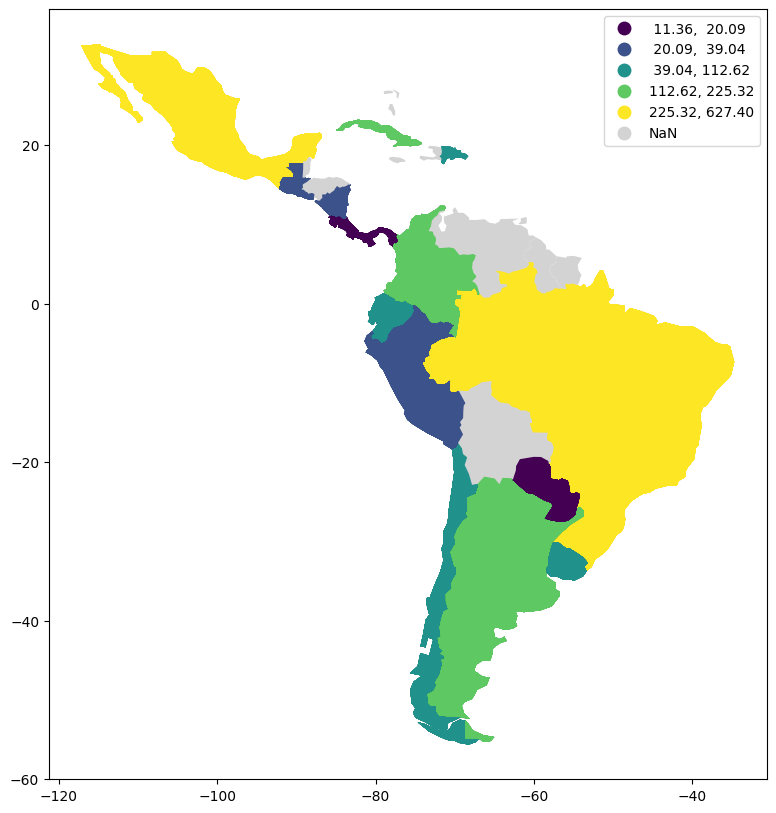

In [26]:
avg_suicides = latambigMap.plot(
    column='avg_suicides',
    legend=True,
    figsize=(15,10),
    missing_kwds={'color': 'lightgrey'},
    scheme='quantiles')

avg_suicides.set(title='Average suicides total in Latin America')

plt.savefig('avgsuicides.jpeg')